In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

SIM_FP = "/Users/massoudmaher/data/bhc_data/100t_pois_ran_walk.json"
sim = pd.read_json(SIM_FP)

In [185]:
sim["cn_data"] = [pd.DataFrame(x) for x in sim["cn_data"]]
sim["plinkage"] = [pd.DataFrame(x) for x in sim["plinkage"]]
sim["clustering"] = [pd.DataFrame(x) for x in sim["clustering"]]

display(sim.head())
print(sim.shape)

,samples_per_cluster,num_bin,max_cn,alpha,init_lambdas,jump_lambdas,cn_data,plinkage,plot_data,clustering,prop_correct
0,8,100,4,0.01,"[3, 1]","[1, 0.1]",chr bin cell_id state start end cl...,i j r_merge merge_count ...,"[[13.0, 15.0, 532.2510128329, 2.0], [11.0, 14....",sample_inds cell_id exp_cl obs_cl 0 ...,0.5625
1,8,100,4,0.01,"[3, 1]","[1, 0.1]",chr bin cell_id state start end cl...,i j r_merge merge_count ...,"[[11.0, 15.0, 1034.3268876448, 2.0], [8.0, 13....",sample_inds cell_id exp_cl obs_cl 0 ...,0.6250
10,8,100,4,0.01,"[3, 1]","[1, 0.1]",chr bin cell_id state start end cl...,i j r_merge merge_count ...,"[[8.0, 10.0, 768.0308724672, 2.0], [11.0, 12.0...",sample_inds cell_id exp_cl obs_cl 0 ...,0.5625
100,8,100,4,0.05,"[3, 1]","[1, 0.1]",chr bin cell_id state start end cl...,i j r_merge merge_count ...,"[[12.0, 15.0, 680.1020627272, 2.0], [9.0, 13.0...",sample_inds cell_id exp_cl obs_cl 0 ...,0.5625
101,8,100,4,0.05,"[3, 1]","[1, 0.1]",chr bin cell_id state start end cl...,i j r_merge merge_count ...,"[[11.0, 15.0, 1201.8317399771, 2.0], [8.0, 13....",sample_inds cell_id exp_cl obs_cl 0 ...,0.6250


(1000, 11)


# Example clustering

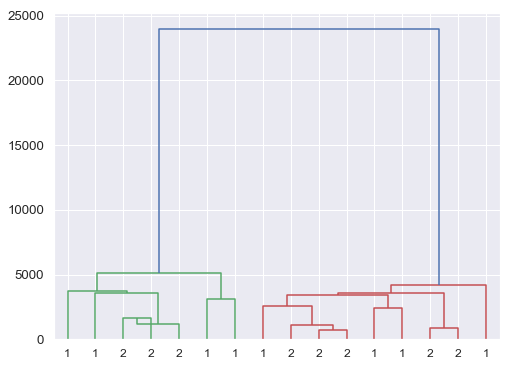

In [192]:
from scipy.cluster.hierarchy import dendrogram
from scgenome.cncluster import bayesian_cluster

scn_data = sim.loc[100,"cn_data"]
splot_data = sim.loc[100, "plot_data"]
sn_states = sim.loc[100, "max_cn"]
salpha = sim.loc[100, "alpha"]

slinkage, sroot, scell_ids = bayesian_cluster(scn_data, n_states=sn_states,
                     alpha=salpha, value_ids=["copy"])

cell_id_labels = scell_ids.str[2]
fig = plt.figure(figsize=(8, 6))
f = dendrogram(splot_data, labels=cell_id_labels)

In [82]:
for x in ["samples_per_cluster","num_bin","max_cn", "alpha","init_lambdas","jump_lambdas"]:
    print(x)
    print(sim[x].value_counts())
    print("-------------------")

samples_per_cluster
8    1000
Name: samples_per_cluster, dtype: int64
-------------------
num_bin
500    500
100    500
Name: num_bin, dtype: int64
-------------------
max_cn
4    1000
Name: max_cn, dtype: int64
-------------------
alpha
0.60    200
0.30    200
0.90    200
0.05    200
0.01    200
Name: alpha, dtype: int64
-------------------
init_lambdas
[3, 1]    1000
Name: init_lambdas, dtype: int64
-------------------
jump_lambdas
[1, 0.1]    1000
Name: jump_lambdas, dtype: int64
-------------------


In [83]:
psim = sim.copy()
psim["alpha"] = np.around(psim["alpha"],2)
for x in ["num_bin"]:
    psim[x] = psim[x].astype("category")

In [84]:
psim100 = psim[psim["num_bin"] == 100]
psim500 = psim[psim["num_bin"] == 500]

ct_psim100 = pd.crosstab(psim100["prop_correct"], psim100["alpha"])
ct_psim500 = pd.crosstab(psim500["prop_correct"], psim500["alpha"])

ct_psim500 = ct_psim500.reindex(index=ct_psim500.index[::-1])
ct_psim100 = ct_psim100.reindex(index=ct_psim100.index[::-1])

alpha,0.01,0.05,0.3,0.6,0.9
prop_correct,,,,,
1.0000,0,0,1,0,0
0.9375,2,0,0,2,0
0.8750,2,1,0,2,1
0.8125,8,9,14,1,5
0.7500,12,10,13,16,6
0.6875,21,25,16,18,16
0.6250,23,20,24,25,22
0.5625,19,28,24,22,29
0.5000,13,7,8,14,21


Text(0.5,1,'num_bin=500')

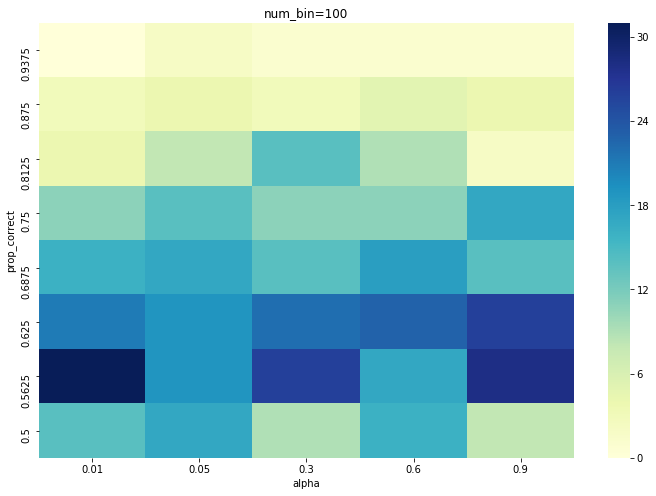

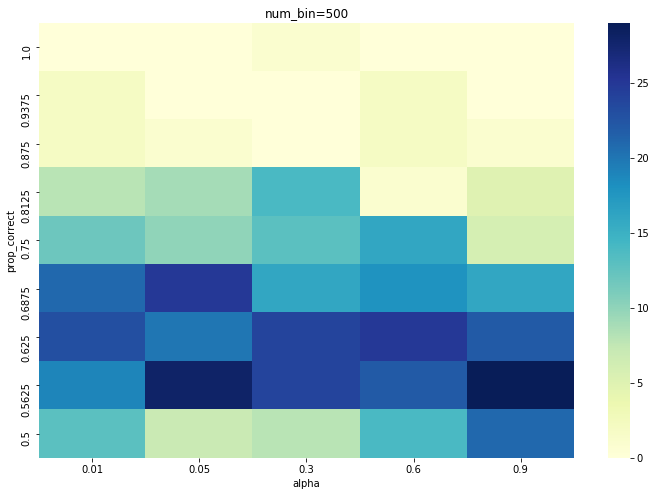

In [85]:
fig = plt.figure(figsize=(12, 8))
sns.heatmap(ct_psim100, cmap="YlGnBu")
plt.title("num_bin=100")

fig = plt.figure(figsize=(12, 8))
sns.heatmap(ct_psim500, cmap="YlGnBu")
plt.title("num_bin=500")

/Users/massoudmaher/Documents/Code/scgenome/venv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


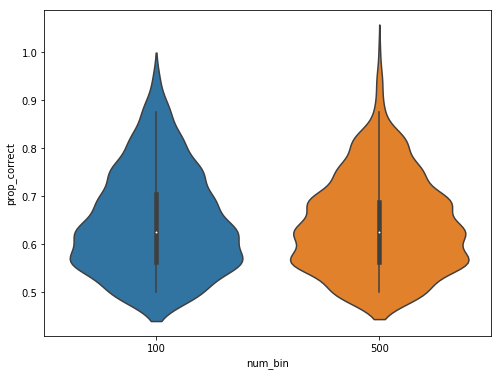

In [86]:
fig = plt.figure(figsize=(8, 6))
sns.violinplot(data=psim, x="num_bin",y="prop_correct")

/Users/massoudmaher/Documents/Code/scgenome/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/massoudmaher/Documents/Code/scgenome/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/massoudmaher/Documents/Code/scgenome/venv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


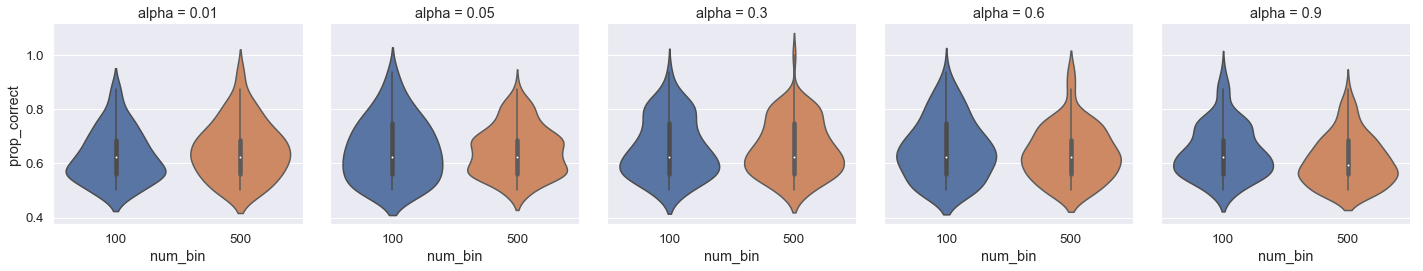

In [96]:
sns.set(font_scale=1.2)
g = sns.FacetGrid(psim, col="alpha", hue="num_bin", size=4)
g.map(sns.violinplot, "num_bin", "prop_correct")

/Users/massoudmaher/Documents/Code/scgenome/venv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


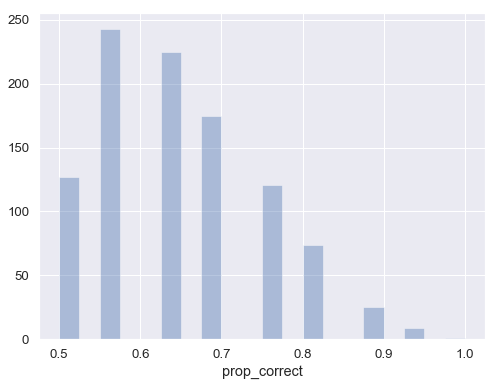

In [103]:
fig = plt.figure(figsize=(8, 6))
sns.distplot(psim["prop_correct"], kde=False)